<a href="https://colab.research.google.com/github/riccardomarin/prog_algo_2022/blob/main/03_ponti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proviamo ad analizzare l'algoritmo dei ponti:

In [ ]:
## Alcuni caratteri speciali che ci saranno utili per i nostri log
CRED = '\033[91m'
CEND = '\033[0m'

CYEL = '\033[4m'
CBLUE = '\33[34m'

In [ ]:
### INSERISCO QUI L'ALGORITMO DELLE SLIDE COME RIFERIMENTO
def ponti(G):
  def DFSr(x, G, Tempo, padre, archi_ponte):
    nonlocal t
    t+=1
    ret = Tempo[x] = t
    for y in G[x]:
      if Tempo[y] == 0:
        a = DFSr(y, G, Tempo, x, archi_ponte)
        if Tempo[x]<a: 
          archi_ponte.add((x,y))
        ret = min(ret,a)
      elif y!= padre:
        ret = min(ret, Tempo[y])
    return ret
  Tempo = [0 for _ in G]
  t=0
  archi_ponte = set()
  DFSr(0, G, Tempo, 0, archi_ponte)
  print(Tempo)
  return archi_ponte

In [ ]:
### ECCO UNA VERSIONE CON UN LOG ESPLICITO DI COSA ACCADE ALL'INTERNO
### DELL'ALGORITMO

def ponti(G):
  def DFSr(x, G, Tempo, padre, archi_ponte):
    print(f"{CYEL} Sono nel nodo:{x} {CEND}")
    nonlocal t
    t+=1
    ret = Tempo[x] = t

    print(f" Il mio tempo vale:{t}")
    for y in G[x]:
      print(f"  Guardo verso il nodo {y} che ha tempo {Tempo[y]}")
      if Tempo[y] == 0:
        a = DFSr(y, G, Tempo, x, archi_ponte)
        print(f"  finita la visita a:{y}")
        if Tempo[x]<a: 
          print(f"  {CBLUE}{Tempo[x]} < {a}: L'arco ({x}, {y}) è ponte!{CEND}")
          archi_ponte.add((x,y))

        print(f"  min({ret},{a})")  
        ret = min(ret,a)
      elif y!= padre:
        print(f"  {y} già visitato e mio padre era {padre}: guardo quale tempo mi conviene tra ret={ret} e Tempo[y] = {Tempo[y]}")  
        ret = min(ret, Tempo[y])

    print(f"{CRED}Esco da nodo:{x} - Sull'arco ({padre},{x}) comunico: {ret} {CEND}")
    return ret

  Tempo = [0 for _ in G]
  t=0
  archi_ponte = set()
  DFSr(0, G, Tempo, 0, archi_ponte)
  print(Tempo)
  return archi_ponte

Dall'esempio delle slides

In [ ]:
import numpy
import networkx as nx

lista = {0: [3,4,5,8],
     1: [2,7],
     2: [1,6,7],
     3: [0,4,7],
     4: [0,3],
     5: [0,8],
     6: [2],
     7: [1,2,3],
     8: [0,5]}

G = nx.Graph(lista)

p = ponti(G)
print(p)

Per visualizzare meglio il risultato, posso colorare gli archi ponte

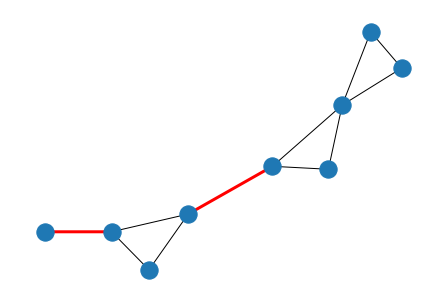

In [ ]:
# Definisco il layout
pos = nx.spring_layout(G)
# Disegno tutto il grafo
nx.draw(G, pos=pos)
# Marco in rosso gli archi ponte
nx.draw_networkx_edges(G,pos,edgelist=p,edge_color='r',width=3)

Proviamo con un altro grafo

In [ ]:
lista = {0: [8,7,6],
     1: [9,8],
     2: [7,6,5,2],
     3: [7],
     4: [7],
     5: [6,2],
     6: [5,2,0],
     7: [4,3,2,0],
     8: [9,1,0],
     9: [8,1]}

p = ponti(lista)

 Sono nel nodo:0 
 Il mio tempo vale:1
  Guardo verso il nodo 8 che ha tempo 0
 Sono nel nodo:8 
 Il mio tempo vale:2
  Guardo verso il nodo 9 che ha tempo 0
 Sono nel nodo:9 
 Il mio tempo vale:3
  Guardo verso il nodo 8 che ha tempo 2
  Guardo verso il nodo 1 che ha tempo 0
 Sono nel nodo:1 
 Il mio tempo vale:4
  Guardo verso il nodo 9 che ha tempo 3
  Guardo verso il nodo 8 che ha tempo 2
  8 già visitato e mio padre era 9: guardo quale tempo mi conviene tra ret=4 e Tempo[y] = 2
Esco da nodo:1 - Sull'arco (9,1) comunico: 2 
  finita la visita a:1
  min(3,2)
Esco da nodo:9 - Sull'arco (8,9) comunico: 2 
  finita la visita a:9
  min(2,2)
  Guardo verso il nodo 1 che ha tempo 4
  1 già visitato e mio padre era 0: guardo quale tempo mi conviene tra ret=2 e Tempo[y] = 4
  Guardo verso il nodo 0 che ha tempo 1
Esco da nodo:8 - Sull'arco (0,8) comunico: 2 
  finita la visita a:8
  1 < 2: L'arco (0, 8) è ponte!
  min(1,2)
  Guardo verso il nodo 7 che ha tempo 0
 Sono nel nodo:7 
 Il mio te